In [1]:
# Standard modules needed
import numpy as np
import pandas as pd
import datetime as dt
from types import SimpleNamespace
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

# Windmill industry in Denmark

This exercise deals with the power generated by windmills in Denmark. As windmills are considered an important element in the transition to a zero emission economy we should take a closer look at the electricity production stemming from them.

To this end, you need to download the official data set containing all windmills in Denmark which produced by the Danish Energy Agency. You can download it using the module `requests` and then save it as the xlsx file `windmills.xlsx`. This is done in the cell below.   


In [2]:
import requests

url = "https://ens.dk/sites/ens.dk/files/Statistik/anlaeg.xlsx"
r = requests.get(url)

with open('windmills.xlsx', 'wb') as xls_file:
    xls_file.write(r.content)   


*Note: `requests` is in the Anaconda distribution, so it should be available to you. If it is not, install it by running `python -m pip install requests` in your terminal.*    

By inspecting `windmills.xlsx` you'll see it has two sheets: 1) `IkkeAfmeldte-Existing turbines` which holds mills (turbines) currently in use and 2) `Afmeldte-Decommissioned` which are no longer in service. Throughout the rest of the exercise, you need to use data from both of them.


### Question 1

1. Load the two sheets of `windmills.xlsx` into your notebook and combine them into one pandas DataFrame. Note that you need to do some data cleaning in the process. For instance, you can disregard the variables which are not present in both sheets. You can decide for yourself whether you want to use English or Danish column names.  
2. Plot the development in total electricity production from windmills between 1977-2021. You may use GWh (1 million KWh) as unit. 

### Question 2

We now want to know how the capacity of electricity production has changed over the years. For this we need two variables `Date of original connection to grid` and `Capacity (kW)`. The first indicates when a mill was initiated and the other its production capacity. 
1. Calculate and plot the development in **average**  and  **maximum** capacity of turbines based on their year of initialization (1977-2021)  
    **Note:** capacity is measured in KW, so you need to multiply with the number of hours pr year to make it comparable with annual production. 
2. To get a cleaner view of the trends, compute and plot the 7 year moving average of annual mean capacity and annual max capacity.   

    $\text{ma}^7(x_t) = \frac{x_{t-3}+x_{t-2}+...+x_{t}+...+x_{t+3}}{7}$
3. Finally, compute the **total capacity** of all windmills in Denmark in each year. Plot total capacity together with actual production as calculated in Question 1.  
    **Note:** the capacity of a turbine should only be included for the years when it is connected to the grid.    

### Question 3

There is a lot of debate about the visual impact on the landscape from windmills. This exercise deals with the relationship between windmill size and productivity to get a sense of the tradeoff. You can solve it in many different ways depending on your preferences. The important thing is that the results are clear. 

1. Compute and plot the relationship between height of windmills and their electricity production in 2021. The variable `Hub height (m)` indicates the height of a mill in meters. One possible approach is to discretize the height variable and compute the median electricity production within each bin. But you can also apply a statistical model of your own choosing.
2. Repeat the method you chose above, but now group over the type of location as well. Locations are described by the variable `Type of location` and can be either *off-shore* ("HAV") or *on-shore* ("LAND","Land"). When plotting the results, use common limits on the y-axis for better comparison.  
4. Finally, we dig into the productivity of on-shore vs. off-shore mills.   
Compute and plot the *average difference* between annual capacity and annual production for mills on-shore and mills off-shore in each year 1990-2021.  

# A discrete-continuous consumption-saving model

Here we will consider a modification to the 2-period consumption saving model.   
In addition to making a consumption-saving choice in the first period, there is now also a binary choice of whether or not to attend costly education. Taking an education is in this model associated with higher expected earnings in period 2 but it comes at a monetary cost in period 1.   

**Second period**  
Household gets utility from **consuming** and **leaving a bequest**:

$$
\begin{aligned}
v_{2}(m_{2})&= \max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho}+\nu\frac{(a_2+\kappa)^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
a_2 &= m_2-c_2 \\
a_2 &\geq 0
\end{aligned}
$$

**First period**   
Household gets utility from consuming. It takes into account that if choosing to go to school today, expected income will be higher in second period.

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1,s}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
s& = \begin{cases} 
1 & \text{if study in period 1} \\
0 & \text{otherwise}
\end{cases}\\
a_1&=m_1-c_1-\tau s\\
m_2&= (1+r)a_1+y_2 \\
y_{2}&= \begin{cases}
\bar{y} + \gamma s +\Delta & \text{with prob. }p\\
\bar{y} + \gamma s -\Delta & \text{with prob. }1-p 
\end{cases}\\
a_1&\geq0
\end{aligned}
$$

* $s$ is a binary indicator for whether the agent chooses to study in period 1.  
* $c$ is consumption
* $\gamma$ is the income premium associated with having studied 
* $\tau$ is the monetary cost of studying, paid in period 1
* $m$ is cash-on-hand  
* $a$ is end-of-period assets
* $\bar{y}$ is base income in period 2
* $y_2$ is total realized income in period 2
* $\Delta \in (0,1)$ is the level of income risk (mean-preserving if $p = 0.5$)
* $r$ is the interest rate
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $a\geq0$ ensures the household *cannot* borrow

**Hint:** the study choice is discrete (and thus not differentiable) which means that it cannot be optimized for in the same manner as the continuous consumption choice. Therefore, you need to solve the consumption problem *for each* of the two study choices and pick the **combination** of studying and consuming that yields highest value as the model solution.  

In [3]:
# Parameters
rho = 8.0
nu = 0.1
kappa = 1  
beta = 0.90

tau = 0.8
gamma = 1.2
ybar = 1.5
r = 0.04
p = 0.5
Delta = 0.4

m_min = tau+1e-5    # minimum value for m - must be possible to pay for studying
m_max = 5.0         # maximum value for m


### Question 1  
1. Solve the model for the parameters above. 
2. Plot $v_1(m_1)$ and $v_2(m_2)$. Comment.
3. Plot the optimal consumption function $c_1^{*}(m_1)$ and $c_2^{*}(m_2)$ in one graph. Comment on the shapes of the functions.
4. Plot the optimal study choice function $\mathbb{I}^{s*}(m_1)$. Comment on the shape of the function.

### Question 2  
1. Given the wage premium on education, compute the **smallest** education cost $\tau$ such that an agent with $m_1 = 3.0$ will **no longer** choose to study.  
    **Hint**: there are different ways of obtaining that number. A bisection algorithm is one possibility. 


In [4]:
from types import SimpleNamespace
import exam_2022 as ex22  # Assuming the file is named model.py

# Define parameters using SimpleNamespace
par = SimpleNamespace(
    rho = 8.0,
    nu = 0.1,
    kappa = 1.0,
    beta = 0.90,
    tau = 0.8,
    gamma = 1.2,
    ybar = 1.5,
    r = 0.04,
    p = 0.5,
    Delta = 0.4,
    m_min = 0.8 + 1e-5,  # tau + 1e-5
    m_max = 5.0,
)

# Solve the model
v1_values, c1_opt_values, m1_values, s_opt_values, v2_values, c2_values, m2_values = ex22.solve_model(par)

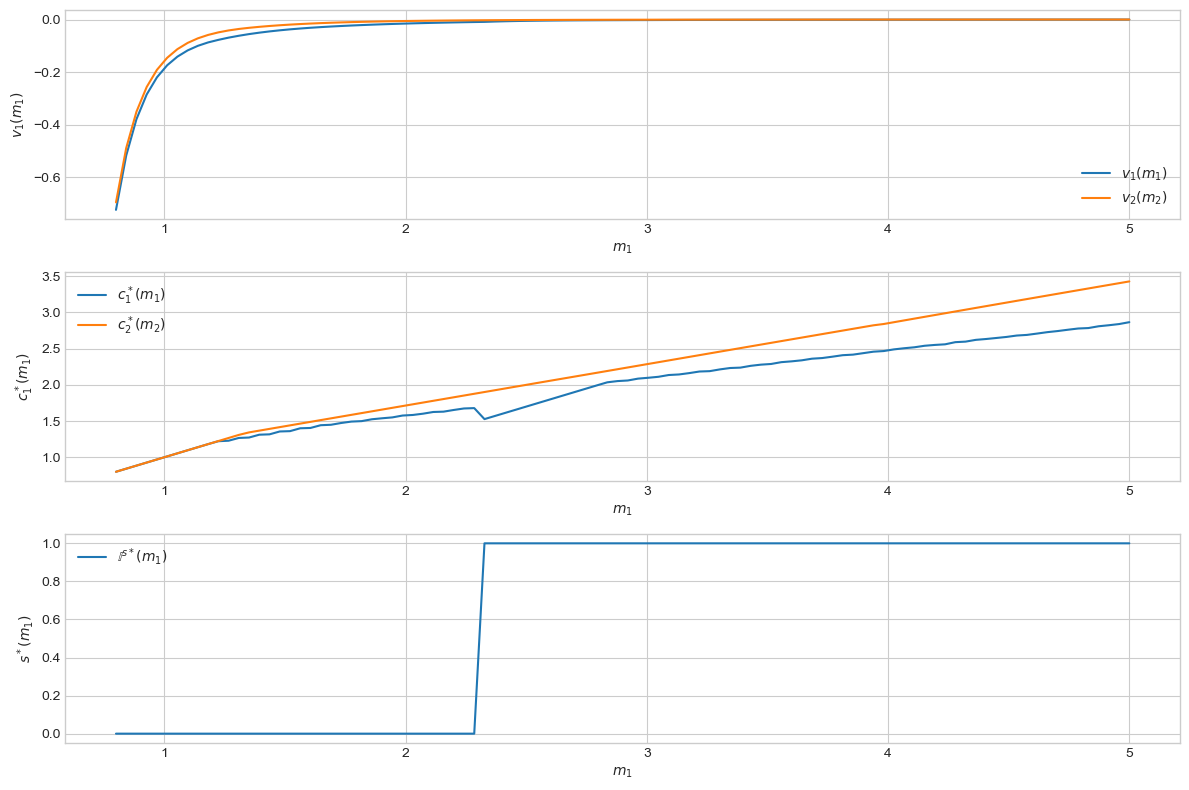

In [5]:
# Plot the results
ex22.plot_results(m1_values, v1_values, c1_opt_values, s_opt_values, m2_values, v2_values, c2_values)

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define parameters
par = {
    'rho': 8.0,
    'nu': 0.1,
    'kappa': 1,
    'beta': 0.90,
    'tau': 0.8,
    'gamma': 1.2,
    'ybar': 1.5,
    'r': 0.04,
    'p': 0.5,
    'Delta': 0.4,
    'm_min': 0.80001,  # tau + 1e-5
    'm_max': 5.0
}

def v_second(m2, par):
    rho = par['rho']
    nu = par['nu']
    kappa = par['kappa']

    def utility(c2, m2):
        a2 = m2 - c2
        if a2 < 0:
            return -np.inf  # Infeasible if a2 < 0
        return (c2**(1-rho))/(1-rho) + nu*((a2 + kappa)**(1-rho))/(1-rho)
    
    return utility

def solve_v_second(par):
    m2_values = np.linspace(par['m_min'], par['m_max'], 100)
    v2_values = []
    c2_values = []

    for m2 in m2_values:
        utility = v_second(m2, par)
        result = minimize(lambda c2: -utility(c2, m2), x0=m2/2, bounds=[(0, m2)])
        c2_opt = result.x[0]
        v2_opt = -result.fun
        v2_values.append(v2_opt)
        c2_values.append(c2_opt)

    return v2_values, c2_values, m2_values

def v_first(m1, par, v2_function):
    rho = par['rho']
    beta = par['beta']
    tau = par['tau']
    gamma = par['gamma']
    ybar = par['ybar']
    r = par['r']
    p = par['p']
    Delta = par['Delta']

    def expected_v2(a1, s):
        m2 = (1 + r) * a1 + ybar + gamma * s
        v2_no_risk = v2_function(m2)
        return p * v2_function(m2 + Delta) + (1 - p) * v2_function(m2 - Delta)
    
    def utility(c1, m1, s):
        a1 = m1 - c1 - tau * s
        if a1 < 0:
            return -np.inf  # Infeasible if a1 < 0
        return (c1**(1-rho))/(1-rho) + beta * expected_v2(a1, s)
    
    return utility

def solve_v_first(par, v2_function):
    m1_values = np.linspace(par['m_min'], par['m_max'], 100)
    v1_values = []
    c1_opt_values = []
    s_opt_values = []

    for m1 in m1_values:
        utility = v_first(m1, par, v2_function)
        results = []
        for s in [0, 1]:
            result = minimize(lambda c1: -utility(c1, m1, s), x0=m1/2, bounds=[(0, m1-par['tau']*s)])
            c1_opt = result.x[0]
            v1_opt = -result.fun
            results.append((v1_opt, c1_opt, s))
        
        best_result = max(results, key=lambda x: x[0])
        v1_values.append(best_result[0])
        c1_opt_values.append(best_result[1])
        s_opt_values.append(best_result[2])

    return v1_values, c1_opt_values, m1_values, s_opt_values

def solve_model(par):
    # Solve second period problem
    v2_values, c2_values, m2_values = solve_v_second(par)

    # Interpolate v2 function for use in first period
    v2_function = interp1d(m2_values, v2_values, kind='linear', fill_value="extrapolate")

    # Solve first period problem
    v1_values, c1_opt_values, m1_values, s_opt_values = solve_v_first(par, v2_function)

    results = {
        'm1_values': m1_values,
        'v1_values': v1_values,
        'c1_opt_values': c1_opt_values,
        's_opt_values': s_opt_values,
        'm2_values': m2_values,
        'v2_values': v2_values,
        'c2_values': c2_values
    }

    return results

def plot_results(results):
    m1_values = results['m1_values']
    v1_values = results['v1_values']
    c1_opt_values = results['c1_opt_values']
    s_opt_values = results['s_opt_values']
    m2_values = results['m2_values']
    v2_values = results['v2_values']
    c2_values = results['c2_values']

    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(m1_values, v1_values, label='$v_1(m_1)$')
    plt.plot(m2_values, v2_values, label='$v_2(m_2)$')
    plt.xlabel('$m_1$')
    plt.ylabel('$v_1(m_1)$')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(m1_values, c1_opt_values, label='$c_1^*(m_1)$')
    plt.plot(m2_values, c2_values, label='$c_2^*(m_2)$')
    plt.xlabel('$m_1$')
    plt.ylabel('$c_1^*(m_1)$')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(m1_values, s_opt_values, label='$\mathbb{I}^{s*}(m_1)$')
    plt.xlabel('$m_1$')
    plt.ylabel('$s^*(m_1)$')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Solve the model
results = solve_model(par)

# Plot the results
plot_results(results)

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define parameters
rho = 8.0
nu = 0.1
kappa = 1
beta = 0.90

tau = 0.8
gamma = 1.2
ybar = 1.5
r = 0.04
p = 0.5
Delta = 0.4

m_min = tau + 1e-5
m_max = 5.0

# Utility function in period 2
def v2(m2):
    def utility(c2, m2):
        a2 = m2 - c2
        if a2 < 0:
            return -np.inf  # Infeasible if a2 < 0
        return (c2**(1-rho))/(1-rho) + nu*((a2 + kappa)**(1-rho))/(1-rho)
    
    # Optimization to find c2 that maximizes utility
    result = minimize(lambda c2: -utility(c2, m2), x0=m2/2, bounds=[(0, m2)])
    c2_opt = result.x[0]
    v2_opt = -result.fun
    return v2_opt, c2_opt

# Utility function in period 1
def v1(m1):
    def expected_v2(a1, s):
        m2 = (1 + r) * a1 + ybar + gamma * s
        v2_no_risk, c2_no_risk = v2(m2)
        return p * v2(m2 + Delta)[0] + (1 - p) * v2(m2 - Delta)[0]
    
    def utility(c1, m1, s):
        a1 = m1 - c1 - tau * s
        if a1 < 0:
            return -np.inf  # Infeasible if a1 < 0
        return (c1**(1-rho))/(1-rho) + beta * expected_v2(a1, s)
    
    # Optimization for both choices of s (study or not study)
    results = []
    for s in [0, 1]:
        result = minimize(lambda c1: -utility(c1, m1, s), x0=m1/2, bounds=[(0, m1-tau*s)])
        c1_opt = result.x[0]
        v1_opt = -result.fun
        results.append((v1_opt, c1_opt, s))
    
    # Choose the best option
    best_result = max(results, key=lambda x: x[0])
    return best_result

# Solve the model for a range of m1 values
m1_values = np.linspace(m_min, m_max, 100)
v1_values = []
c1_opt_values = []
s_opt_values = []

for m1 in m1_values:
    v1_opt, c1_opt, s_opt = v1(m1)
    v1_values.append(v1_opt)
    c1_opt_values.append(c1_opt)
    s_opt_values.append(s_opt)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(m1_values, v1_values, label='$v_1(m_1)$')
plt.xlabel('$m_1$')
plt.ylabel('$v_1(m_1)$')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(m1_values, c1_opt_values, label='$c_1^*(m_1)$')
plt.xlabel('$m_1$')
plt.ylabel('$c_1^*(m_1)$')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(m1_values, s_opt_values, label='$\mathbb{I}^{s*}(m_1)$')
plt.xlabel('$m_1$')
plt.ylabel('$s^*(m_1)$')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from types import SimpleNamespace

mp = SimpleNamespace(
    rho = 8.0,
    nu = 0.1,
    kappa = 1.0,
    beta = 0.90,
    tau = 0.8,
    gamma = 1.2,
    ybar = 1.5,
    r = 0.04,
    p = 0.5,
    Delta = 0.4,
    m_min = 0.80001,
    m_max = 5.0,
    Nm = 1000
)

# Solve the model
m1_grid, c1_func, s_func, v1_func, m2_grid, c2_func, v2_func, v1_schoice = q2.solve(mp)

In [ ]:
# Plot v_1(m_1) and v_2(m_2)
plt.figure(figsize=(10, 6))
plt.plot(m1_grid, v1_func, label='$v_1(m_1)$')
plt.plot(m2_grid, v2_func, label='$v_2(m_2)$')
plt.xlabel('$m$')
plt.ylabel('$v$')
plt.title('Value Functions')
plt.legend()
plt.grid(True)
plt.show()

# Plot c_1(m_1) and c_2(m_2)
plt.figure(figsize=(10, 6))
plt.plot(m1_grid, c1_func, label='$c_1(m_1)$')
plt.plot(m2_grid, c2_func, label='$c_2(m_2)$')
plt.xlabel('$m$')
plt.ylabel('$c$')
plt.title('Consumption Policy Functions')
plt.legend()
plt.grid(True)
plt.show()

# Plot s(m_1)
plt.figure(figsize=(10, 6))
plt.plot(m1_grid, s_func, label='$s(m_1)$')
plt.xlabel('$m_1$')
plt.ylabel('$s$')
plt.title('Schooling Choice Function')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
transition_indices = np.where(np.diff(s_func) == 1)[0]

# If there's at least one transition point
if len(transition_indices) > 0:
    # The first transition index
    transition_index = transition_indices[0]
    transition_m1 = m1_grid[transition_index]
    print(f"The value of m1 where s(m1) changes from 0 to 1 is approximately: {transition_m1}")
else:
    print("There is no transition from 0 to 1 in the schooling choice function s(m1).")

# Approximating a function

In this exercise, you will implement an algorithm to approximate a function $f(x)$ if $x$ is on the interval $[-1,1]$.  

A degree $N$ approximation of $f(x)$ takes the general form 
$$
\hat{f}(x) = \sum_{i=0}^{N} a_i T_i(x)
$$

for which you need 3 elements: 
1. the functions $T_i(x)$  
2. $M$ evaluation nodes $\{z_k\}$.
3. $N$ coefficients $\{a_i\}$  

**1.**  
The functions $T_i(x)$ take the form 
$$
T_i(x) = \cos(i\times\arccos(x))
$$ 
**2.**  
The true function $f$ needs to be evaluated on a set of nodes so that we can use these function evaluations for our approximation. The set of nodes where $f$ is evaluated, $\{z_k\}$, has to be chosen wisely such that the approximation error is minimized.  
It turns out to be on the form 
$$
z_k = -cos(\frac{2k-1}{2M}\pi), \:\:\:\: k=1,2,3,\dots,M
$$ 
**3.**  
The $N$ coefficients of the approximation are obtained by what is essentially a least squares regression. They are on the form
$$
a_i = \frac{\sum_{k=1}^M f(z_k) T_i(z_k)}{\sum_{k=1}^M T_i(z_k)^2}, \:\:\:\: i=0,1,2,\dots,N
$$ 
**Notes:**  in general one can let $N<M$.   
Observe that we are using $M$ evaluations of $f(z)$ to create **each** of the $N$ approximation coefficients. This can be done up front and needs only to be done once even if you need to approximate $f$ on multiple $x$'s. This is why such an approximation is useful in the context of solving an economic model. For instance, a value function may be very computationally intensive, so you'll benefit from only having to to evaluate it $M$ times in order to get, say, $K>>M$ function approximations.    

### Question 1 

Create an approximator $\hat{f}(x)$ at an $x\in[-1,1]$ by implementing the following algorithm:

1. For each $k=1,...,M$: compute $z_k = -cos(\frac{2k-1}{2M}\pi)$
2. For each $k=1,...,M$: compute $y_k = f(z_k)$
3. For each $i=0,...,N$: compute $a_i = \frac{\sum_{k=1}^M y_k T_i(z_k)}{\sum_{k=1}^M T_i(z_k)^2}$
4. Return $\sum_{i=0}^{N} a_i T_i(x)$

In [ ]:
def f_approx(x, f, N, M):
    pass

In [8]:
import numpy as np

def f_approx(x, f, N, M):
    """Approximate the function f(x) using Chebyshev polynomials up to degree N."""
    
    def T_i(i, x):
        """Compute the Chebyshev polynomial T_i(x)."""
        return np.cos(i * np.arccos(x))
    
    def compute_nodes(M):
        """Compute the evaluation nodes z_k."""
        return np.array([-np.cos((2*k - 1) / (2 * M) * np.pi) for k in range(1, M+1)])
    
    def compute_approximation_coefficients(f, z, N):
        """Compute the approximation coefficients a_i."""
        y = np.array([f(z_k) for z_k in z])
        a = np.zeros(N + 1)
        for i in range(N + 1):
            T_i_z = np.array([T_i(i, z_k) for z_k in z])
            a[i] = np.sum(y * T_i_z) / np.sum(T_i_z ** 2)
        return a
    
    # Step 1: Compute evaluation nodes z_k
    z = compute_nodes(M)
    
    # Step 2: Evaluate f at each z_k
    y = np.array([f(z_k) for z_k in z])
    
    # Step 3: Compute coefficients a_i
    a = compute_approximation_coefficients(f, z, N)
    
    # Step 4: Compute the approximation sum
    approximation = sum(a[i] * T_i(i, x) for i in range(N + 1))
    
    return approximation

# Example usage:
# Define the true function to approximate
def true_function(x):
    return np.sin(np.pi * x)

# Set the degree of approximation and number of nodes
N = 5
M = 10

# Compute the approximation at a specific point x
x = 0.5
approx_value = f_approx(x, true_function, N, M)
print(f"The approximation of f at x={x} is {approx_value}")

The approximation of f at x=0.5 is 1.0036732005362825


**Note:** you can use the numpy functions `np.arccos` in $T_i$ and `np.cos` in $z_k$. 

### Question 2 


Evaluate `f_approx` at $x \in \{-0.5, 0.0, 0.98\}$ and report in each case also the deviation from the true value `f(x)`. 

Use the following   

In [ ]:
f = lambda x: 1/(1+x**2) + x**3 - 0.5*x
N = 5
M = 8
xs = np.array([-0.5, 0.0, 0.98])